# Steps:
- Read an image file.
- The image file will consist of RGB layers. So, convert all RGB layers to each vector. The image will change from (m,n,p) to (m*n,p).

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/robin.jpg


In [2]:
import cv2
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np

In [3]:
img=mpimg.imread('/kaggle/input/robin.jpg')

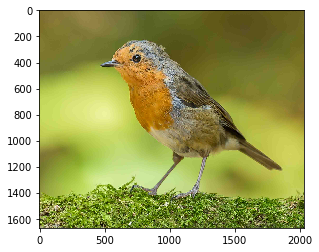

In [4]:
imgplot = plt.imshow(img)

In [5]:
img=img/255

In [6]:
img.shape

(1670, 2028, 3)

In [7]:
img_new=np.reshape(img, (img.shape[0] * img.shape[1], img.shape[2]))

In [8]:
m,n=img_new.shape

In [9]:
def distance(x1, y1, x2, y2): 
    dist = np.sqrt(np.square(x1 - x2) + np.square(y1 - y2))
    return dist 

In [10]:
centroids=np.zeros((64,n))# 64 is the number of colors we are choosing out of the image to be compressed

In [11]:
centroids

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0

In [24]:
# random initialization of means.  
for i in range(64): 
    rand1 = np.random.random(1)[0]
    rand2 = np.random.random(1)[0]
    rand3 = np.random.random(1)[0]
    centroids[i, 0] = rand1
    centroids[i, 1] = rand2 
    centroids[i, 2] = rand3 

In [25]:
centroids

array([[0.80583204, 0.08861584, 0.30424907],
       [0.57332141, 0.17162   , 0.1690062 ],
       [0.29274466, 0.03249556, 0.1747963 ],
       [0.3467081 , 0.45228627, 0.23325773],
       [0.00970598, 0.77714165, 0.07051253],
       [0.02226285, 0.10715507, 0.23232344],
       [0.14399283, 0.46268701, 0.19835669],
       [0.17799808, 0.53957418, 0.79890697],
       [0.24175652, 0.8736971 , 0.93774943],
       [0.36740099, 0.84944557, 0.90291293],
       [0.48468258, 0.46967212, 0.2486143 ],
       [0.43416287, 0.91778547, 0.84032216],
       [0.49896841, 0.46736102, 0.67873533],
       [0.66403386, 0.67273131, 0.4348303 ],
       [0.64702701, 0.87237359, 0.98617573],
       [0.85434551, 0.04665357, 0.29599897],
       [0.93860602, 0.05317964, 0.105292  ],
       [0.83328669, 0.09610976, 0.37794803],
       [0.87272008, 0.48909066, 0.13139674],
       [0.06531369, 0.06376897, 0.96032127],
       [0.91957007, 0.18513568, 0.63788793],
       [0.87754297, 0.56958771, 0.81757371],
       [0.